In [44]:
%matplotlib inline

In [45]:
df = pd.read_csv("pbc.csv", index_col=0).iloc[:312]
df['status'] = df['status'] == 2

df = df[['age', 'albumin', 'protime', 'bili', 'edema', 'time', 'status']].copy()
df.describe()

,age,albumin,protime,bili,edema,time
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,50.019007,3.520000,10.725641,3.256090,0.110577,2006.362179
std,10.581261,0.419892,1.004323,4.530315,0.274507,1123.280843
min,26.277892,1.960000,9.000000,0.300000,0.000000,41.000000
25%,42.238877,3.310000,10.000000,0.800000,0.000000,1191.000000
50%,49.794661,3.550000,10.600000,1.350000,0.000000,1839.500000
75%,56.714579,3.800000,11.100000,3.425000,0.000000,2697.250000
max,78.439425,4.640000,17.100000,28.000000,1.000000,4556.000000


In [73]:
from lifelines import CoxPHFitter
import statsmodels.api as sm
from patsy import dmatrix

df_ = dmatrix('age + log(albumin) + log(protime) + edema - 1', df, return_type='dataframe')
df_['T'] = df['time']
df_['E'] = df['status']

cph = CoxPHFitter().fit(df_, 'T', 'E')
martingale_residuals = cph.compute_residuals(df_, 'deviance').sort_index()['deviance'].values



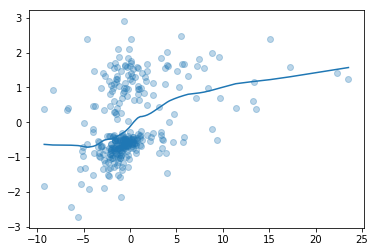

In [74]:
ols = sm.OLS(df['bili'], dmatrix('age + log(albumin) + log(protime) + edema', df, return_type='dataframe')).fit()

ols_residuals = ols.resid.values

ix = np.argsort(ols_residuals)
ols_residuals = ols_residuals[ix]
martingale_residuals = martingale_residuals[ix]

ax = plt.scatter(ols_residuals, martingale_residuals, alpha=0.3)

from lifelines.utils import lowess

ax = plt.plot(ols_residuals, 
         lowess.lowess(ols_residuals, martingale_residuals))


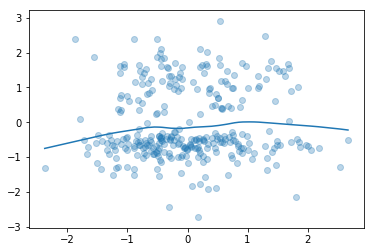

In [75]:

ols = sm.OLS(np.log(df['bili']), dmatrix('age + log(albumin) + log(protime) + edema', df, return_type='dataframe')).fit()
ols_residuals = ols.resid.values
ix = np.argsort(ols_residuals)

ols_residuals = ols_residuals[ix]
martingale_residuals = martingale_residuals[ix]

ax = plt.scatter(ols_residuals, martingale_residuals, alpha=0.3)
ax = plt.plot(ols_residuals, 
         lowess.lowess(ols_residuals, martingale_residuals))
